# Perceptron for regression

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(123) 

## Example chart for linear regression

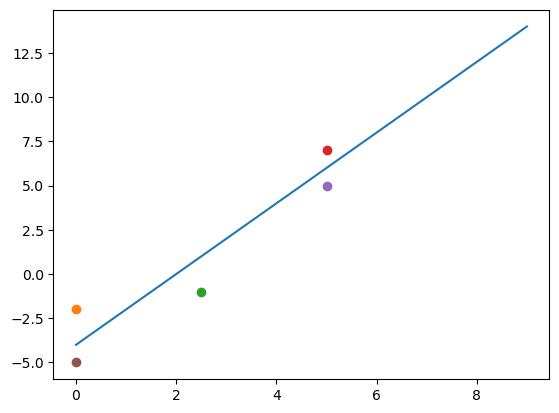

In [29]:
#In simple words the goal of linear regression is to find linear function that best fits data points.

x = np.array(range(0, 10))
y = x*2-4
plt.plot(x, y)
plt.plot(0, -2, 'o')
plt.plot(2.5, -1, 'o')
plt.plot(5, 7, 'o')
plt.plot(5, 5, 'o')
plt.plot(0, -5, 'o')

plt.show()

## Linear Regression
Linear regression helps to find parameters a and b for standard linear function y= ax + b. This can be described can be described as:

$$\hat{y} = wx + b,\tag{1}$$ 

It can be written also in matrix form:

\begin{align}
Z &=  w X + b,\\
\hat{Y} &= Z,
\tag{3}\end{align}


Steps for building a neural network:
1. Define the artificial neural network structure: number of hidden layers and units inside these layers  
2. Initialize the model's parameters
3. Loop:
3.1 Forward propagation - pass input through all connected units and calculate the perceptron output
3.2 Backward propagation - calculate how much current result differs from expectations and update params in network to give a bit better results on each run 
3.3 Update network parameters.
4. Make predictions.

## Predict apartment price in city of Poznan based on area 

In [56]:
# First need to load the data
data = pd.read_csv("houses.csv", encoding='ISO-8859-1')
data.head(10)

,Unnamed: 0,address,city,floor,id,latitude,longitude,price,rooms,sq,year
0,0,Podgórze Zab³ocie Stanis³awa Klimeckiego,Kraków,2.0,23918.0,50.049224,19.970379,749000.0,3.0,74.05,2021.0
1,1,Praga-Po³udnie Grochowska,Warszawa,3.0,17828.0,52.249775,21.106886,240548.0,1.0,24.38,2021.0
2,2,Krowodrza Czarnowiejska,Kraków,2.0,22784.0,50.066964,19.920025,427000.0,2.0,37.00,1970.0
3,3,Grunwald,Poznañ,2.0,4315.0,52.404212,16.882542,1290000.0,5.0,166.00,1935.0
4,4,Ochota Gotowy budynek. Stan deweloperski. Osta...,Warszawa,1.0,11770.0,52.212225,20.972630,996000.0,5.0,105.00,2020.0
5,5,Nowa Huta Czy¿yny ul. Woniców,Kraków,2.0,26071.0,50.046943,19.997153,414600.0,1.0,34.55,2022.0
6,6,Podgórze P³aszów Koszykarska,Kraków,0.0,22569.0,50.049893,19.990603,750000.0,4.0,81.40,2021.0
7,7,Mokotów Pory,Warszawa,10.0,13308.0,52.184058,21.044302,2890000.0,6.0,280.00,2003.0
8,8,Ursynów Wy¿yny,Warszawa,3.0,11387.0,52.140282,21.056345,615000.0,4.0,63.40,1982.0
9,9,Bemowo,Warszawa,1.0,10904.0,52.238974,20.913288,429000.0,1.0,40.00,1999.0


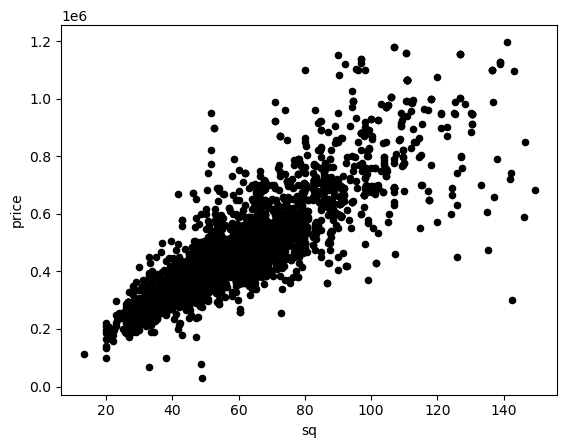

In [59]:
#inline plot in notebook
%matplotlib inline 
#display plot with price depending on square footage before normalization
data.plot(x='sq', y='price', kind='scatter', c='black')

# normalize the data
# remove outliers
data = data.where(data['city'] == 'Poznañ')
data['sq'] = data['sq'].where(data['sq'] < 150)
data['price'] = data['price'].where(data['price'] < 1200000)
# remove empty values
data.dropna(subset = ['sq', 'price'], inplace=True)

<Axes: xlabel='sq', ylabel='price'>

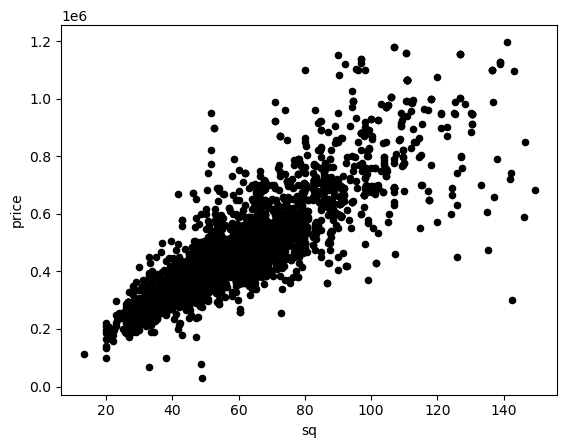

In [60]:
#display plot with price depending on square footage after normalization
data.plot(x='sq', y='price', kind='scatter', c='black')

In [61]:
#save the fields into variables X and Y and reshape them to row vectors:
X = data['sq']
Y = data['price']

X = np.array(X).reshape((1, len(X)))
Y = np.array(Y).reshape((1, len(Y)))

print ('shape of X: ' + str(X.shape))
print ('shape of Y: ' + str(Y.shape))

shape of X: (1, 4091)
shape of Y: (1, 4091)


## Create artificial neural network

### Define number of input and output units

In [62]:
n_x = X.shape[0]
n_y = Y.shape[0]
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 1
The size of the output layer is: n_y = 1


### Initialize network parameters

Init network parameters with very small random number for weights and zero for biases. 

In [63]:
def init_params(n_x, n_y):
    """
    :param n_x: 
    :param n_y: 
    :return: 
    W - weights
    b - biases
    """
    W = np.random.randn(n_y, n_x) * 0.01
    b = np.zeros((n_y, 1))
    
    return (W, b)

(W, b) = init_params(n_x, n_y)
print("W = " + str(W))
print("b = " + str(b))

W = [[-0.005786]]
b = [[0.]]


### Forward propagation

In [64]:
def forward_propagation(X, W, b):
    """
    W - weights
    b - biases
    :return:
    Y_hat 
    """
    # Forward Propagation to calculate Z.
    Z = np.matmul(W, X) + b
    Y_hat = Z

    return Y_hat

Y_hat = forward_propagation(X, W, b)

print("Some elements of output vector Y_hat:", Y_hat[0, 0:5])

Some elements of output vector Y_hat: [-0.34883809 -0.44777873 -0.38488489 -0.45003528 -0.33703465]


### Compute cost

Cost can be computed from formula below:
$$\mathcal{L}\left(w, b\right)  = \frac{1}{2m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)^2$$

In [71]:
def cost(Y_hat, Y):
    """
    Returns:
    cost -- sum of squares scaled by 1/(2*number of examples)
    """
    # Number of examples.
    m = Y_hat.shape[1]

    # Compute the cost function.
    cost = np.sum((Y_hat - Y)**2/(2*m))
    
    return cost

print("Cost = " + str(cost(Y_hat, Y)))

Cost = 117216313612.55383


## Calculate partial derivatives 

 Partial derivatives show the direction in which weights should be updated. 

\begin{align}
\frac{\partial \mathcal{L} }{ \partial w } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right)x^{(i)},\\
\frac{\partial \mathcal{L} }{ \partial b } &= 
\frac{1}{m}\sum_{i=1}^{m} \left(\hat{y}^{(i)} - y^{(i)}\right).
\end{align}

In [66]:
def backward_propagation(Y_hat, X, Y):
    """
    Implements the backward propagation, calculating gradients
    """
    m = X.shape[1]
    
    # Backward propagation: calculate partial derivatives denoted as dW, db for simplicity. 
    dZ = Y_hat - Y
    dW = 1/m * np.dot(dZ, X.T)
    db = 1/m * np.sum(dZ, axis = 1, keepdims = True)
    
    return (dW, db)

(dW, db) = backward_propagation(Y_hat, X, Y)

print("dW = " + str(dW))
print("db = " + str(db))

dW = [[-29332289.59843532]]
db = [[-456093.79103022]]


## Update parameters

\begin{align}
w &= w - \alpha \frac{\partial \mathcal{L} }{ \partial w },\\
b &= b - \alpha \frac{\partial \mathcal{L} }{ \partial b }.
\end{align}


In [77]:
def update_params(W, b, dW, db, alpha=1.2):
    # Update rule for each parameter.
    W = W - alpha * dW
    b = b - alpha * db
    
    return (W, b)

(W, b) = update_params(W, b, dW, db) 

print("new W = " + str(W))
print("new b = " + str(b))

new W = [[52798121.27139758]]
new b = [[820968.8238544]]



### Put everything together

In [78]:
def nn_model(X, Y, iterations=100, alpha=0.2):
    n_x = X.shape[0]
    n_y = y.shape[0]

    W, b = init_params(n_x, n_y)
    
    for i in range(0, iterations):
         
        # Forward propagation. Inputs: "X, parameters". Outputs: "Y_hat".
        Y_hat = forward_propagation(X, W, b)
        
        # Cost function. Inputs: "Y_hat, Y". Outputs: "cost".
        cost_value = cost(Y_hat, Y)
        
        # Backpropagation. Inputs: "Y_hat, X, Y". Outputs: "grads".
        dW, db = backward_propagation(Y_hat, X, Y)
    
        # Gradient descent parameter update. Inputs: "parameters, grads, learning_rate". Outputs: "parameters".
        W, b = update_params(W, b, dW, db, alpha)
        
        print ("Cost after %i: %f" %(i, cost_value))

    return W, b

In [79]:
newW, newB = nn_model(X, Y)
print("W = " + str(W))
print("b = " + str(b))

Cost after 0: 1172163421620.293945
Cost after 1: 651167161760380544.000000
Cost after 2: 373791193601011504644096.000000
Cost after 3: 214568351577076685027542040576.000000
Cost after 4: 123169240706220838952348580501782528.000000
Cost after 5: 70703166355348512816032009196887919820800.000000
Cost after 6: 40585926356365142903960085711604379498240278528.000000
Cost after 7: 23297647094410254038398667420105910819965342886920192.000000
Cost after 8: 13373610235474108485954702802581393469077732395718744735744.000000
Cost after 9: 7676889001091006251798063105561596619924836025690295375398699008.000000
Cost after 10: 4406784981571044156453878611819521842005208933001132267289663093342208.000000
Cost after 11: 2529638486506741833806405726306119450919262693379991086073099885629956685824.000000
Cost after 12: 1452095098621039848403050882057087265881942502562251235290824817705413297559306240.000000
Cost after 13: 83355000593426660091242712477336694874646265908928582153368895298389378857200624074

/tmp/ipykernel_12544/3233446913.py:10: RuntimeWarning: overflow encountered in square
  cost = np.sum((Y_hat - Y)**2/(2*m))


You can see that after a few iterations the cost function does not change anymore (the model converges).

*Note*: This is a very simple model. In reality the models do not converge that quickly.

The final model parameters can be used for making predictions, but don't forget about normalization and denormalization.

In [19]:
def predict(X, Y, W, b, X_pred):
    
    # Retrieve each parameter from the dictionary "parameters".
    W = parameters["W"]
    b = parameters["b"]
    
    # Use the same mean and standard deviation of the original training array X.
    if isinstance(X, pd.Series):
        X_mean = np.mean(X)
        X_std = np.std(X)
        X_pred_norm = ((X_pred - X_mean)/X_std).reshape((1, len(X_pred)))
    else:
        X_mean = np.array(np.mean(X)).reshape((len(X.axes[1]),1))
        X_std = np.array(np.std(X)).reshape((len(X.axes[1]),1))
        X_pred_norm = ((X_pred - X_mean)/X_std)
    # Make predictions.
    Y_pred_norm = np.matmul(W, X_pred_norm) + b
    # Use the same mean and standard deviation of the original training array Y.
    Y_pred = Y_pred_norm * np.std(Y) + np.mean(Y)
    
    return Y_pred[0]

X_pred = np.array([50, 120, 280])
Y_pred = predict(adv["TV"], adv["Sales"], parameters_simple, X_pred)
print(f":\n{X_pred}")
print(f":\n{Y_pred}")

TV marketing expenses:
[ 50 120 280]
Predictions of sales:
[ 9.40942557 12.7369904  20.34285287]


Let's plot the linear regression line and some predictions. The regression line is red and the predicted points are blue.

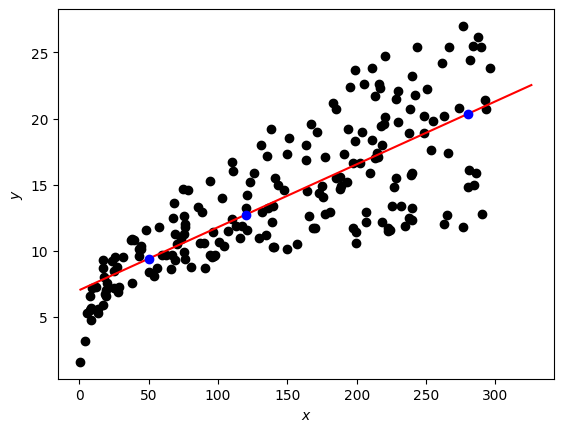

In [20]:
fig, ax = plt.subplots()
plt.scatter(adv["TV"], adv["Sales"], color="black")

plt.xlabel("$x$")
plt.ylabel("$y$")
    
X_line = np.arange(np.min(adv["TV"]),np.max(adv["TV"])*1.1, 0.1)
Y_line = predict(adv["TV"], adv["Sales"], parameters_simple, X_line)
ax.plot(X_line, Y_line, "r")
ax.plot(X_pred, Y_pred, "bo")
plt.plot()
plt.show()